In [61]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import interp
import math
from itertools import cycle

# for plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# for machine learning
from sklearn import svm, datasets
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# for assessment
from sklearn import metrics



# for Dimensionality reduction
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif,f_regression,SelectPercentile,VarianceThreshold
import scipy.stats as sp

# fix random state
random_state = np.random.RandomState(0)

# for LOO
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# silence the warning
import warnings
warnings.filterwarnings('ignore')

# for assessment
from sklearn import metrics
from scipy.stats import randint as sp_randint

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import  RandomizedSearchCV

from sklearn.model_selection import  GridSearchCV

from collections import Counter

# load our private dataset

In [62]:
# import data T2
dT2_FirstOrdered = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/FirstOrdered_T2/UTokyoSarcomaChondrosarcoma_FirstOrdered_T2.txt', delim_whitespace=True,header=0)
dT2_ShapeSize= pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/FirstOrdered_T2/UTokyoSarcomaChondrosarcoma_ShapeSize_T2.txt', sep=' ',header=0)

dT2_16GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesGLCM_T2.txt', delim_whitespace=True,header=0)
dT2_16GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesGLRLM_T2.txt', delim_whitespace=True,header=0)
dT2_16GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesGLSZM_T2.txt', delim_whitespace=True,header=0)
dT2_16NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesNGLDM_T2.txt', delim_whitespace=True,header=0)
dT2_16NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_T2/UTokyoSarcomaChondrosarcoma_texturesNGTDM_T2.txt', delim_whitespace=True,header=0)

dT2_32GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesGLCM_T2.txt', delim_whitespace=True,header=0)
dT2_32GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesGLRLM_T2.txt', delim_whitespace=True,header=0)
dT2_32GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesGLSZM_T2.txt', delim_whitespace=True,header=0)
dT2_32NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesNGLDM_T2.txt', delim_whitespace=True,header=0)
dT2_32NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_T2/UTokyoSarcomaChondrosarcoma_texturesNGTDM_T2.txt', delim_whitespace=True,header=0)

dT2_64GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesGLCM_T2.txt', delim_whitespace=True,header=0)
dT2_64GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesGLRLM_T2.txt', delim_whitespace=True,header=0)
dT2_64GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesGLSZM_T2.txt', delim_whitespace=True,header=0)
dT2_64NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesNGLDM_T2.txt', delim_whitespace=True,header=0)
dT2_64NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_T2/UTokyoSarcomaChondrosarcoma_texturesNGTDM_T2.txt', delim_whitespace=True,header=0)

dT2_128GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesGLCM_T2.txt', delim_whitespace=True,header=0)
dT2_128GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesGLRLM_T2.txt', delim_whitespace=True,header=0)
dT2_128GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesGLSZM_T2.txt', delim_whitespace=True,header=0)
dT2_128NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesNGLDM_T2.txt', delim_whitespace=True,header=0)
dT2_128NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_T2/UTokyoSarcomaChondrosarcoma_texturesNGTDM_T2.txt', delim_whitespace=True,header=0)

# import data GD
dGD_FirstOrdered = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/FirstOrdered_GD/UTokyoSarcomaChondrosarcoma_FirstOrdered_GD.txt', delim_whitespace=True,header=0)
dGD_ShapeSize = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/FirstOrdered_GD/UTokyoSarcomaChondrosarcoma_ShapeSize_GD.txt', delim_whitespace=True,header=0)
dGD_16GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesGLCM_GD.txt', delim_whitespace=True,header=0)
dGD_16GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesGLRLM_GD.txt', delim_whitespace=True,header=0)
dGD_16GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesGLSZM_GD.txt', delim_whitespace=True,header=0)
dGD_16NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesNGLDM_GD.txt', delim_whitespace=True,header=0)
dGD_16NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_16_GD/UTokyoSarcomaChondrosarcoma_texturesNGTDM_GD.txt', delim_whitespace=True,header=0)

dGD_32GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesGLCM_GD.txt', delim_whitespace=True,header=0)
dGD_32GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesGLRLM_GD.txt', delim_whitespace=True,header=0)
dGD_32GLSZM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesGLSZM_GD.txt', delim_whitespace=True,header=0)
dGD_32NGLDM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesNGLDM_GD.txt', delim_whitespace=True,header=0)
dGD_32NGTDM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_32_GD/UTokyoSarcomaChondrosarcoma_texturesNGTDM_GD.txt', delim_whitespace=True,header=0)

dGD_64GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesGLCM_GD.txt', delim_whitespace=True,header=0)
dGD_64GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesGLRLM_GD.txt', delim_whitespace=True,header=0)
dGD_64GLSZM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesGLSZM_GD.txt', delim_whitespace=True,header=0)
dGD_64NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesNGLDM_GD.txt', delim_whitespace=True,header=0)
dGD_64NGTDM = pd.read_csv('/home/utokyo-glioma/Desktop/radiomics/Quantization_64_GD/UTokyoSarcomaChondrosarcoma_texturesNGTDM_GD.txt', delim_whitespace=True,header=0)

dGD_128GLCM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesGLCM_GD.txt', delim_whitespace=True,header=0)
dGD_128GLRLM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesGLRLM_GD.txt', delim_whitespace=True,header=0)
dGD_128GLSZM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesGLSZM_GD.txt', delim_whitespace=True,header=0)
dGD_128NGLDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesNGLDM_GD.txt', delim_whitespace=True,header=0)
dGD_128NGTDM = pd.read_csv( '/home/utokyo-glioma/Desktop/radiomics/Quantization_128_GD/UTokyoSarcomaChondrosarcoma_texturesNGTDM_GD.txt', delim_whitespace=True,header=0)

In [63]:
#check number of columns and rows
print(dT2_FirstOrdered.shape)
print(dT2_ShapeSize.shape)
print(dT2_16GLCM.shape, dT2_16GLRLM.shape, dT2_16GLSZM.shape, dT2_16NGLDM.shape, dT2_16NGTDM.shape)
print(dT2_32GLCM.shape, dT2_32GLRLM.shape, dT2_32GLSZM.shape, dT2_32NGLDM.shape, dT2_32NGTDM.shape)
print(dT2_64GLCM.shape, dT2_64GLRLM.shape, dT2_64GLSZM.shape, dT2_64NGLDM.shape, dT2_64NGTDM.shape)
print(dT2_128GLCM.shape, dT2_128GLRLM.shape, dT2_128GLSZM.shape, dT2_128NGLDM.shape, dT2_128NGTDM.shape)

#check number of columns and rows
print(dGD_FirstOrdered.shape)
print(dGD_ShapeSize.shape)
print(dGD_16GLCM.shape, dGD_16GLRLM.shape, dGD_16GLSZM.shape, dGD_16NGLDM.shape, dGD_16NGTDM.shape)
print(dGD_32GLCM.shape, dGD_32GLRLM.shape, dGD_32GLSZM.shape, dGD_32NGLDM.shape, dGD_32NGTDM.shape)
print(dGD_64GLCM.shape, dGD_64GLRLM.shape, dGD_64GLSZM.shape, dGD_64NGLDM.shape, dGD_64NGTDM.shape)
print(dGD_128GLCM.shape, dGD_128GLRLM.shape, dGD_128GLSZM.shape, dGD_128NGLDM.shape, dGD_128NGTDM.shape)

(57, 344)
(57, 10)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 344)
(57, 10)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)
(57, 101) (57, 119) (57, 119) (57, 146) (57, 47)


In [64]:
dGD_128GLCM


,Num,Dnum,ROIGEnergy,ROIGContrast,ROIGEntropy,ROIGHomogeneity1,ROIGHomogeneity2,ROIGCorrelation,ROIGSumAverage,ROIGVariance,...,HHHGContrast,HHHGEntropy,HHHGHomogeneity1,HHHGHomogeneity2,HHHGCorrelation,HHHGSumAverage,HHHGVariance,HHHGDissimilarity,HHHGAutoCorrelation,HHHGCorrelation1
0,1,1,0.000567,222.713002,11.476824,0.184752,0.105080,0.661295,0.003783,0.020095,...,769.025511,12.265270,0.104109,0.045672,-0.004707,0.003952,0.023351,21.628365,4189.902085,6.784345e+07
1,2,3,0.000441,236.156101,11.972136,0.193118,0.113309,0.717306,0.003724,0.025467,...,717.751015,12.463962,0.114749,0.053635,-0.011827,0.003933,0.021644,20.350879,4147.915936,6.267788e+07
2,3,4,0.000349,355.064692,12.033860,0.148997,0.076766,0.486997,0.004041,0.021185,...,815.852082,12.460563,0.105701,0.047823,-0.015293,0.003921,0.024509,22.100044,4120.567244,7.044167e+07
3,4,5,0.000546,181.734169,11.530680,0.199267,0.116043,0.698363,0.003668,0.018356,...,695.587114,12.406058,0.114412,0.053049,-0.003422,0.003933,0.021153,20.096298,4150.239319,6.111275e+07
4,5,6,0.000380,197.411132,11.962876,0.190880,0.109634,0.779136,0.004279,0.027266,...,739.398224,12.546083,0.110192,0.050604,-0.010746,0.003938,0.022323,20.951460,4158.063253,6.778618e+07
5,6,7,0.000470,243.013511,11.812533,0.178262,0.099755,0.614424,0.003897,0.019207,...,693.017134,12.407170,0.115564,0.054256,-0.011249,0.003945,0.020910,20.066978,4172.690915,6.096641e+07
6,7,8,0.000330,194.289148,12.084901,0.186634,0.106155,0.773275,0.003970,0.026145,...,767.810508,12.610387,0.109287,0.050004,-0.010837,0.003937,0.023179,21.321877,4156.190679,7.085896e+07
7,8,9,0.000229,369.386438,12.494903,0.139714,0.069818,0.584915,0.003929,0.027153,...,823.217469,12.669786,0.105166,0.047627,-0.006162,0.003927,0.024954,22.296104,4135.827026,7.688996e+07
8,9,10,0.000483,241.696705,11.728785,0.183085,0.104264,0.630230,0.003817,0.019925,...,619.082716,12.224827,0.122466,0.058893,-0.010868,0.003934,0.018683,18.789935,4151.749211,5.226066e+07
9,10,11,0.000347,176.690556,12.029607,0.197293,0.115925,0.796914,0.003930,0.026534,...,734.771057,12.531016,0.112362,0.052041,-0.013104,0.003938,0.022132,20.752762,4157.031488,6.517586e+07


In [65]:
# change rownames
dT2_FirstOrdered.index=dT2_FirstOrdered['Dnum']
dT2_ShapeSize.index=dT2_ShapeSize['Dnum']
    
# extract data
dT2_FirstOrdered= dT2_FirstOrdered.iloc[:,2:344]
dT2_ShapeSize= dT2_ShapeSize.iloc[:,2:10]
   
# integrate data
dT2_nontxt=pd.concat([dT2_FirstOrdered, dT2_ShapeSize], axis=1)
    
# change rownames
dT2_nontxt=dT2_nontxt.rename(columns=lambda s : "dT2"+s)

In [66]:
# change rownames
dGD_FirstOrdered.index=dGD_FirstOrdered['Dnum']
dGD_ShapeSize.index=dGD_ShapeSize['Dnum']
    
# extract data
dGD_FirstOrdered= dGD_FirstOrdered.iloc[:,2:344]
dGD_ShapeSize= dGD_ShapeSize.iloc[:,2:10]
   
# integrate data
dGD_nontxt=pd.concat([dGD_FirstOrdered, dGD_ShapeSize], axis=1)
    
# change rownames
dGD_nontxt=dGD_nontxt.rename(columns=lambda s : "dGD"+s)

In [67]:
dGD_FirstOrdered

,ROIMax,ROIMin,ROIMean,ROIMedian,ROIRange,ROIVariance,ROISkewness,ROIKurtosis,ROIEnergy,ROI10thPercentile,...,HHHhistrMeanAD,HHHhistMedianAD,HHHhistCV,HHHhistQCD,HHHEntropy,HHHUniformity,HHHhistMaxGrad,HHHhistMaxGradGL,HHHhistMinGrad,HHHhistMinGradGL
Dnum,,,,,,,,,,,,,,,,,,,,,
1,2.499625,-0.592224,0.656376,0.628206,3.091848,0.187756,0.727329,1.381769,306.610177,0.157082,...,4.166885,5.974343,0.249722,0.142857,4.963322,0.039611,16.5,28.0,-14.5,37.0
3,4.735702,-0.430916,1.299757,1.192933,5.166618,0.398587,0.810418,0.997723,29900.282312,0.633058,...,2.215418,3.383188,0.141692,0.076923,4.195950,0.070438,495.5,30.0,-461.5,36.0
4,3.425515,-0.698990,1.366895,1.383131,4.124505,0.200642,-0.388754,1.633911,1994.541274,0.850213,...,4.107168,6.009403,0.232674,0.130435,4.994613,0.038995,22.0,30.0,-25.5,39.0
5,3.705573,-0.637984,0.807321,0.733199,4.343557,0.262877,1.502555,3.964999,3543.517374,0.291018,...,2.621285,3.671631,0.173806,0.103448,4.309844,0.064960,219.5,25.0,-214.0,32.0
6,3.736411,-0.781488,1.936131,2.072516,4.517898,0.466587,-0.719224,0.206369,66712.715799,0.965056,...,2.083440,2.904740,0.134303,0.068966,3.969270,0.080959,837.5,27.0,-927.0,32.0
7,3.420178,-0.477783,0.975017,0.906282,3.897961,0.173634,1.200564,3.330373,7164.151181,0.555072,...,2.419399,3.396546,0.164985,0.087719,4.199277,0.071073,321.0,26.0,-354.5,31.0
8,3.274145,-0.691645,1.270886,1.233808,3.965790,0.303713,0.048450,-0.223767,47737.283113,0.600179,...,2.266708,3.040560,0.139951,0.084746,4.035769,0.076825,1525.5,27.0,-1573.0,32.0
9,3.468542,-0.460158,1.480343,1.499003,3.928699,0.352250,-0.073398,-0.342881,15615.833091,0.680378,...,2.282923,3.260928,0.161129,0.094340,4.127137,0.070972,212.5,24.0,-206.0,30.0
10,4.084582,-0.669266,1.102071,1.001017,4.753848,0.258982,1.342494,2.571437,8461.443883,0.585355,...,1.382817,1.845245,0.087183,0.047619,3.325407,0.131984,1079.5,30.0,-1196.0,33.0


In [68]:
def make_df_dT2_txt (a, b, c, d, e):
    
    a.index = a ['Dnum']
    b.index = b ['Dnum']
    c.index = c ['Dnum']
    d.index = d ['Dnum']
    e.index = e ['Dnum']

    # Data extraction
    a = a.iloc [:, 2: 101]
    b = b. iloc [:, 2: 119]
    c = c.iloc [:, 2: 119]
    d = d. iloc [:, 2: 146]
    e = e.iloc [:, 2: 47]
   

    # Integration of all data
    d_all = pd.concat ([a, b, c, d, e], axis = 1)

    # Column name change
    d_all = d_all.rename (columns = lambda s: "dT2" + s)
    
    return d_all

In [69]:
def make_df_dGD_txt (a, b, c, d, e):
    
    a.index = a ['Dnum']
    b.index = b ['Dnum']
    c.index = c ['Dnum']
    d.index = d ['Dnum']
    e.index = e ['Dnum']

    # Data extraction
    a = a.iloc [:, 2: 101]
    b = b. iloc [:, 2: 119]
    c = c.iloc [:, 2: 119]
    d = d. iloc [:, 2: 146]
    e = e.iloc [:, 2: 47]
   

    # Integration of all data
    d_all = pd.concat ([a, b, c, d, e], axis = 1)

    # Column name change
    d_all = d_all.rename (columns = lambda s: "dGD" + s)
    
    return d_all

In [70]:
dT2_16_txt = make_df_dT2_txt (dT2_16GLCM, dT2_16GLRLM, dT2_16GLSZM, dT2_16NGLDM, dT2_16NGTDM)
dT2_32_txt = make_df_dT2_txt (dT2_32GLCM, dT2_32GLRLM, dT2_32GLSZM, dT2_32NGLDM, dT2_32NGTDM)
dT2_64_txt = make_df_dT2_txt (dT2_64GLCM, dT2_64GLRLM, dT2_64GLSZM, dT2_64NGLDM, dT2_64NGTDM)
dT2_128_txt = make_df_dT2_txt (dT2_128GLCM, dT2_128GLRLM, dT2_128GLSZM, dT2_128NGLDM, dT2_128NGTDM)

In [71]:
dT2_16_txt = dT2_16_txt.rename (columns = lambda s: "16bit" + s)
dT2_32_txt = dT2_32_txt.rename (columns = lambda s: "32bit" + s)
dT2_64_txt = dT2_64_txt.rename (columns = lambda s: "64bit" + s)
dT2_128_txt = dT2_128_txt.rename (columns = lambda s: "128bit" + s)

In [72]:
dGD_16_txt = make_df_dGD_txt (dGD_16GLCM, dGD_32GLRLM, dGD_16GLSZM, dGD_16NGLDM, dGD_16NGTDM)
dGD_32_txt = make_df_dGD_txt (dGD_32GLCM, dGD_32GLRLM, dGD_32GLSZM, dGD_32NGLDM, dGD_32NGTDM)
dGD_64_txt = make_df_dGD_txt (dGD_64GLCM, dGD_64GLRLM, dGD_64GLSZM, dGD_64NGLDM, dGD_64NGTDM)
dGD_128_txt = make_df_dGD_txt (dGD_128GLCM, dGD_128GLRLM, dGD_128GLSZM, dGD_128NGLDM, dGD_128NGTDM)

In [73]:
dGD_16_txt = dGD_16_txt.rename (columns = lambda s: "16bit" + s)
dGD_32_txt = dGD_32_txt.rename (columns = lambda s: "32bit" + s)
dGD_64_txt = dGD_64_txt.rename (columns = lambda s: "64bit" + s)
dGD_128_txt = dGD_128_txt.rename (columns = lambda s: "128bit" + s)

In [74]:
# integrate T2data 
dfT2raw=pd.concat([dT2_nontxt, dT2_16_txt, dT2_32_txt, dT2_64_txt,  dT2_128_txt], axis=1)

In [75]:
dfT2raw

,dT2ROIMax,dT2ROIMin,dT2ROIMean,dT2ROIMedian,dT2ROIRange,dT2ROIVariance,dT2ROISkewness,dT2ROIKurtosis,dT2ROIEnergy,dT2ROI10thPercentile,...,128bitdT2HHLCoarseness,128bitdT2HHLContrast,128bitdT2HHLBusyness,128bitdT2HHLComplexity,128bitdT2HHLStrength,128bitdT2HHHCoarseness,128bitdT2HHHContrast,128bitdT2HHHBusyness,128bitdT2HHHComplexity,128bitdT2HHHStrength
Dnum,,,,,,,,,,,,,,,,,,,,,
1,2.647534,-0.550044,1.289947,1.333884,3.197578,0.255670,-0.309392,0.250959,2015.043476,0.591774,...,0.002614,0.786346,0.043428,88897.133355,11.287351,0.002489,0.853431,0.050057,83310.390016,10.142910
3,3.123263,-0.780814,1.387764,1.467820,3.904076,0.384637,-0.550772,0.109627,19511.629590,0.539332,...,0.000264,0.766198,0.430358,93239.335692,1.159753,0.000273,0.690402,0.398689,90151.802172,1.192087
4,1.910440,-0.690500,0.488966,0.460979,2.600941,0.178072,0.107980,-0.292161,707.016538,-0.044482,...,0.001836,0.950618,0.065962,102750.597232,7.898665,0.001898,0.803842,0.058214,98444.090542,8.363536
5,3.264952,-0.822825,1.349106,1.396610,4.087777,0.316791,-0.276554,-0.021280,6255.295236,0.589725,...,0.000579,0.893979,0.203168,106669.844212,2.545176,0.000591,0.828603,0.189793,104441.479986,2.593780
6,3.215753,-0.746138,1.555201,1.656760,3.961892,0.279919,-0.865340,0.930391,28142.523316,0.818728,...,0.000212,0.699337,0.513934,98257.900767,0.953183,0.000215,0.696995,0.500917,96977.377304,0.956631
7,2.314401,-0.850238,0.500447,0.486635,3.164639,0.227808,0.164164,-0.151562,6310.970904,-0.127772,...,0.000342,0.828328,0.331466,103621.528026,1.518007,0.000350,0.790003,0.318667,102047.402779,1.534766
8,3.594218,-1.314003,1.046239,1.153308,4.908222,0.518497,-0.494404,0.005111,37938.915934,0.036758,...,0.000099,0.800322,1.141834,100723.899611,0.435334,0.000101,0.735400,1.090706,97932.463890,0.443748
9,3.873126,-0.701931,1.821923,1.740028,4.575057,0.898297,0.005837,-1.115706,53812.645226,0.599781,...,0.000265,0.716617,0.409503,96956.794350,1.152532,0.000272,0.718481,0.397162,95677.498013,1.156686
10,3.792534,-0.784934,2.224019,2.344999,4.577468,0.395120,-1.012080,1.113872,70221.822918,1.356050,...,0.000218,0.795882,0.515417,102797.703631,0.966687,0.000222,0.747592,0.494568,100466.570334,0.985248


In [76]:
print(dfT2raw.shape)

(57, 2438)


In [77]:
# T2 data normalization
d_array=sp.stats.zscore(dfT2raw,axis=0)
dfT2raw=pd.DataFrame(d_array, index=dfT2raw.index, columns=dfT2raw.columns)

In [78]:
# delete NA
dfT2raw=dfT2raw.dropna(axis=1, how='any')

In [79]:
print(dfT2raw.shape)

(57, 2438)


In [80]:
# integrate Gd data
dfGDraw=pd.concat([dGD_nontxt, dGD_16_txt, dGD_32_txt, dGD_64_txt, dGD_128_txt], axis=1)

In [81]:
print(dfGDraw.shape)

(57, 2438)


In [82]:
# Gd data normalization
d_array=sp.stats.zscore(dfGDraw,axis=0)
dfGDraw=pd.DataFrame(d_array, index=dfGDraw.index, columns=dfGDraw.columns)

In [83]:
print(dfGDraw.shape)

(57, 2438)


In [84]:
# delete NA
dfGDraw=dfGDraw.dropna(axis=1, how='any')

In [85]:
print(dfGDraw.shape)
print(dfT2raw.shape)


(57, 2438)
(57, 2438)


In [86]:
dfT2raw

,dT2ROIMax,dT2ROIMin,dT2ROIMean,dT2ROIMedian,dT2ROIRange,dT2ROIVariance,dT2ROISkewness,dT2ROIKurtosis,dT2ROIEnergy,dT2ROI10thPercentile,...,128bitdT2HHLCoarseness,128bitdT2HHLContrast,128bitdT2HHLBusyness,128bitdT2HHLComplexity,128bitdT2HHLStrength,128bitdT2HHHCoarseness,128bitdT2HHHContrast,128bitdT2HHHBusyness,128bitdT2HHHComplexity,128bitdT2HHHStrength
Dnum,,,,,,,,,,,,,,,,,,,,,
1,-0.998673,0.724561,-0.607162,-0.639745,-1.220482,-0.788515,0.777333,-0.425367,-0.860640,-0.334765,...,1.714047,0.326196,-0.860180,-0.794710,2.031616,1.603246,1.257042,-0.856829,-1.507800,1.725665
3,-0.452226,-0.220024,-0.456483,-0.452798,-0.396486,-0.278851,0.345182,-0.521068,-0.256662,-0.431730,...,-0.615866,0.154770,0.590623,-0.252605,-0.688893,-0.611277,-0.325545,0.529684,-0.573542,-0.678070
4,-1.845338,0.149648,-1.841005,-1.858141,-1.916346,-1.095174,1.524567,-0.793131,-0.905793,-1.511199,...,0.942697,1.723875,-0.775688,0.934834,1.121336,1.012640,0.775662,-0.824389,0.558845,1.247816
5,-0.289475,-0.391983,-0.516033,-0.552193,-0.182234,-0.546971,0.836124,-0.609709,-0.714268,-0.338554,...,-0.303558,1.241972,-0.261231,1.424135,-0.316736,-0.293488,1.016026,-0.301098,1.377844,-0.301646
6,-0.345988,-0.078089,-0.198561,-0.189077,-0.329055,-0.692685,-0.217999,0.034698,0.041274,0.084871,...,-0.667421,-0.414104,0.903993,0.373940,-0.744383,-0.669238,-0.261544,0.936245,0.358552,-0.741301
7,-1.381327,-0.504190,-1.823320,-1.822331,-1.258899,-0.898622,1.625155,-0.697927,-0.712346,-1.665201,...,-0.538533,0.683392,0.219825,1.043566,-0.592658,-0.534328,0.641321,0.211435,1.050911,-0.586043
8,0.088737,-2.402468,-0.982574,-0.891792,0.774660,0.250150,0.446100,-0.591839,0.379443,-1.360986,...,-0.779455,0.445108,3.258317,0.681810,-0.883489,-0.783162,0.111268,3.281842,0.488978,-0.879035
9,0.409105,0.102859,0.212302,-0.072852,0.386086,1.751080,1.341698,-1.350779,0.927399,-0.319961,...,-0.614874,-0.267081,0.512426,0.211503,-0.690833,-0.612276,-0.052971,0.523611,0.181042,-0.687576
10,0.316533,-0.236888,0.831697,0.771563,0.388898,-0.237423,-0.480712,0.158938,1.493840,1.078376,...,-0.661473,0.407331,0.909553,0.940715,-0.740755,-0.662243,0.229621,0.910995,0.835033,-0.733616


In [87]:
dallraw=pd.concat([dfT2raw, dfGDraw], axis=1)

In [88]:
dallraw

,dT2ROIMax,dT2ROIMin,dT2ROIMean,dT2ROIMedian,dT2ROIRange,dT2ROIVariance,dT2ROISkewness,dT2ROIKurtosis,dT2ROIEnergy,dT2ROI10thPercentile,...,128bitdGDHHLCoarseness,128bitdGDHHLContrast,128bitdGDHHLBusyness,128bitdGDHHLComplexity,128bitdGDHHLStrength,128bitdGDHHHCoarseness,128bitdGDHHHContrast,128bitdGDHHHBusyness,128bitdGDHHHComplexity,128bitdGDHHHStrength
Dnum,,,,,,,,,,,,,,,,,,,,,
1,-0.998673,0.724561,-0.607162,-0.639745,-1.220482,-0.788515,0.777333,-0.425367,-0.860640,-0.334765,...,1.357442,0.592393,-0.848727,-1.632505,1.598295,1.483423,0.697658,-0.846352,-1.358403,1.557326
3,-0.452226,-0.220024,-0.456483,-0.452798,-0.396486,-0.278851,0.345182,-0.521068,-0.256662,-0.431730,...,-0.502436,-0.514670,0.461536,-0.318123,-0.566019,-0.516369,-0.302315,0.457865,-0.307949,-0.561211
4,-1.845338,0.149648,-1.841005,-1.858141,-1.916346,-1.095174,1.524567,-0.793131,-0.905793,-1.511199,...,0.413768,0.507788,-0.751156,0.308023,0.555725,0.504777,0.272230,-0.769185,0.687283,0.639564
5,-0.289475,-0.391983,-0.516033,-0.552193,-0.182234,-0.546971,0.836124,-0.609709,-0.714268,-0.338554,...,-0.341681,-0.478535,-0.298482,-0.193023,-0.364193,-0.348067,-0.358552,-0.297406,-0.364951,-0.358510
6,-0.345988,-0.078089,-0.198561,-0.189077,-0.329055,-0.692685,-0.217999,0.034698,0.041274,0.084871,...,-0.547712,-0.051304,1.211172,0.458707,-0.625431,-0.563970,-0.210891,1.161538,0.131467,-0.616320
7,-1.381327,-0.504190,-1.823320,-1.822331,-1.258899,-0.898622,1.625155,-0.697927,-0.712346,-1.665201,...,-0.429181,-0.320794,-0.010505,-0.312091,-0.473426,-0.437035,-0.498410,-0.051199,-0.527018,-0.464094
8,0.088737,-2.402468,-0.982574,-0.891792,0.774660,0.250150,0.446100,-0.591839,0.379443,-1.360986,...,-0.595023,-0.036872,3.402590,0.451208,-0.685347,-0.614970,-0.106771,3.307312,0.202791,-0.677673
9,0.409105,0.102859,0.212302,-0.072852,0.386086,1.751080,1.341698,-1.350779,0.927399,-0.319961,...,-0.335068,0.357614,-0.267690,1.112608,-0.360684,-0.331067,0.146911,-0.295726,0.628203,-0.346999
10,0.316533,-0.236888,0.831697,0.771563,0.388898,-0.237423,-0.480712,0.158938,1.493840,1.078376,...,-0.453091,-0.663124,0.078918,-0.292710,-0.500129,-0.459135,-0.863479,0.008770,-1.221597,-0.482422


In [89]:
print(dallraw.shape)

(57, 4876)


In [90]:
dallraw['type']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
dfT2raw['type']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
dfGDraw['type']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
#chondrosarcoma(1) 、chordoma(0)

In [91]:
print(dallraw.shape)

(57, 4877)


## Row names with one and two digits indicate cases of chordoma. A four-digit number in the row name indicates chondrosarcoma.

In [92]:
# make training data of all
# dall is a training dataset of all data (GdT1 and T2)
dall=pd.concat([dallraw.loc[1:33,],dallraw.loc[1001:1024,]], axis=0)
# make test data of all
# dall_test is a test dataset of all data (GdT1 and T2)
dall_test=pd.concat([dallraw.loc[35:39,],dallraw.loc[1025:1029,]], axis=0)

In [93]:
# make training data of T2
# dfT2 is a training dataset of T2 data
dfT2=pd.concat([dfT2raw.loc[1:33,], dfT2raw.loc[1001:1024,]], axis=0)
# make test data of T2
# dfT2_test is a test dataset of T2 data
dfT2_test=pd.concat([dfT2raw.loc[35:39,], dfT2raw.loc[1025:1029,]], axis=0)

In [94]:
# make training data of GD
# dfGD is a training dataset of GdT1 data
dfGD=pd.concat([dfGDraw.loc[1:33,], dfGDraw.loc[1001:1024,]], axis=0)
# make test data of GD
# dfGD_test is a test dataset of GdT1 data
dfGD_test=pd.concat([dfGDraw.loc[35:39,], dfGDraw.loc[1025:1029,]], axis=0)

In [95]:
print(dfGD.shape)
print(dfGD_test.shape)

(47, 2439)
(10, 2439)


In [96]:
dfGD

,dGDROIMax,dGDROIMin,dGDROIMean,dGDROIMedian,dGDROIRange,dGDROIVariance,dGDROISkewness,dGDROIKurtosis,dGDROIEnergy,dGDROI10thPercentile,...,128bitdGDHHLContrast,128bitdGDHHLBusyness,128bitdGDHHLComplexity,128bitdGDHHLStrength,128bitdGDHHHCoarseness,128bitdGDHHHContrast,128bitdGDHHHBusyness,128bitdGDHHHComplexity,128bitdGDHHHStrength,type
Dnum,,,,,,,,,,,,,,,,,,,,,
1,-1.073150,-0.279548,-1.021921,-1.000911,-1.072538,-0.669285,0.635318,0.044882,-0.644492,-0.950386,...,0.592393,-0.848727,-1.632505,1.598295,1.483423,0.697658,-0.846352,-1.358403,1.557326,0
3,0.485294,0.246065,-0.176219,-0.285359,0.457930,-0.109089,0.745047,-0.140503,0.105939,-0.079887,...,-0.514670,0.461536,-0.318123,-0.566019,-0.516369,-0.302315,0.457865,-0.307949,-0.561211,0
4,-0.427847,-0.627439,-0.087969,-0.044364,-0.310791,-0.635046,-0.838606,0.166595,-0.601690,0.317262,...,0.507788,-0.751156,0.308023,0.555725,0.504777,0.272230,-0.769185,0.687283,0.639564,0
5,-0.232659,-0.428655,-0.823509,-0.867877,-0.149206,-0.469682,1.659098,1.291850,-0.562411,-0.705434,...,-0.478535,-0.298482,-0.193023,-0.364193,-0.348067,-0.358552,-0.297406,-0.364951,-0.358510,0
6,-0.211167,-0.896255,0.660272,0.829139,-0.020603,0.071593,-1.275032,-0.522503,1.039422,0.527295,...,-0.051304,1.211172,0.458707,-0.625431,-0.563970,-0.210891,1.161538,0.131467,-0.616320,0
7,-0.431567,0.093351,-0.603078,-0.648568,-0.477903,-0.706809,1.260282,0.985506,-0.470600,-0.222513,...,-0.320794,-0.010505,-0.312091,-0.473426,-0.437035,-0.498410,-0.051199,-0.527018,-0.464094,0
8,-0.533345,-0.603506,-0.214169,-0.233567,-0.427869,-0.361177,-0.261225,-0.730137,0.558247,-0.140018,...,-0.036872,3.402590,0.451208,-0.685347,-0.614970,-0.106771,3.307312,0.202791,-0.677673,0
9,-0.397859,0.150781,0.061155,0.102455,-0.455229,-0.232210,-0.422140,-0.787635,-0.256283,0.006655,...,0.357614,-0.267690,1.112608,-0.360684,-0.331067,0.146911,-0.295726,0.628203,-0.346999,0
10,0.031493,-0.530585,-0.436071,-0.528531,0.153448,-0.480032,1.447718,0.619155,-0.437703,-0.167130,...,-0.663124,0.078918,-0.292710,-0.500129,-0.459135,-0.863479,0.008770,-1.221597,-0.482422,0


In [97]:
print(dfT2.shape)
print(dfT2_test.shape)

(47, 2439)
(10, 2439)


In [98]:
print(dall.shape)
print(dall_test.shape)

(47, 4877)
(10, 4877)


In [99]:
# Calculate 5 time mean accuracy
def make_cross(df,a, discriminator):
    Y=df [a]
    X = df.drop([a],axis=1)
    d_instance = discriminator
    n_future,p_result,cross_mean =[],[],[]
    for j in range(1,11):
        selector = RFE(d_instance, n_features_to_select=j)
        for i in range(0,5):
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=i)
            selector.fit(X_train,Y_train)
            class_predict = selector.predict(X_test)
            result=metrics.accuracy_score(Y_test, class_predict)
            p_result.append(result)
        ave=np.average(p_result)
        cross_mean.append(ave)
        n_future.append(j)
        p_result=[]

    l=[]
    for i in range(1,11):
        l.append(i)
    df=pd.DataFrame({'Acurrency': cross_mean}, index=l)
    return(cross_mean,df.T)

In [100]:
# make graph of Calculated 5 time mean accuracy
def make_graph_pre(cross_mean, colors='blue'):
    l=[]
    for i in range(1,11):
        l.append(i)
            #グラフ化
    get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")
    plt.figure(dpi=300)
    plt.plot(l, cross_mean,color=colors)
    plt.ylim([0.5,1.005])
    plt.xlabel("number of Feature value")
    plt.ylabel("mean accuracy")
    plt.show()

In [101]:
cross_all_log, df=make_cross(dfGD,'type', LogisticRegression(random_state=0))
df


,1,2,3,4,5,6,7,8,9,10
Acurrency,0.583333,0.633333,0.65,0.65,0.6,0.583333,0.616667,0.683333,0.65,0.683333


In [102]:
df.to_csv("logisticGD47all.csv")

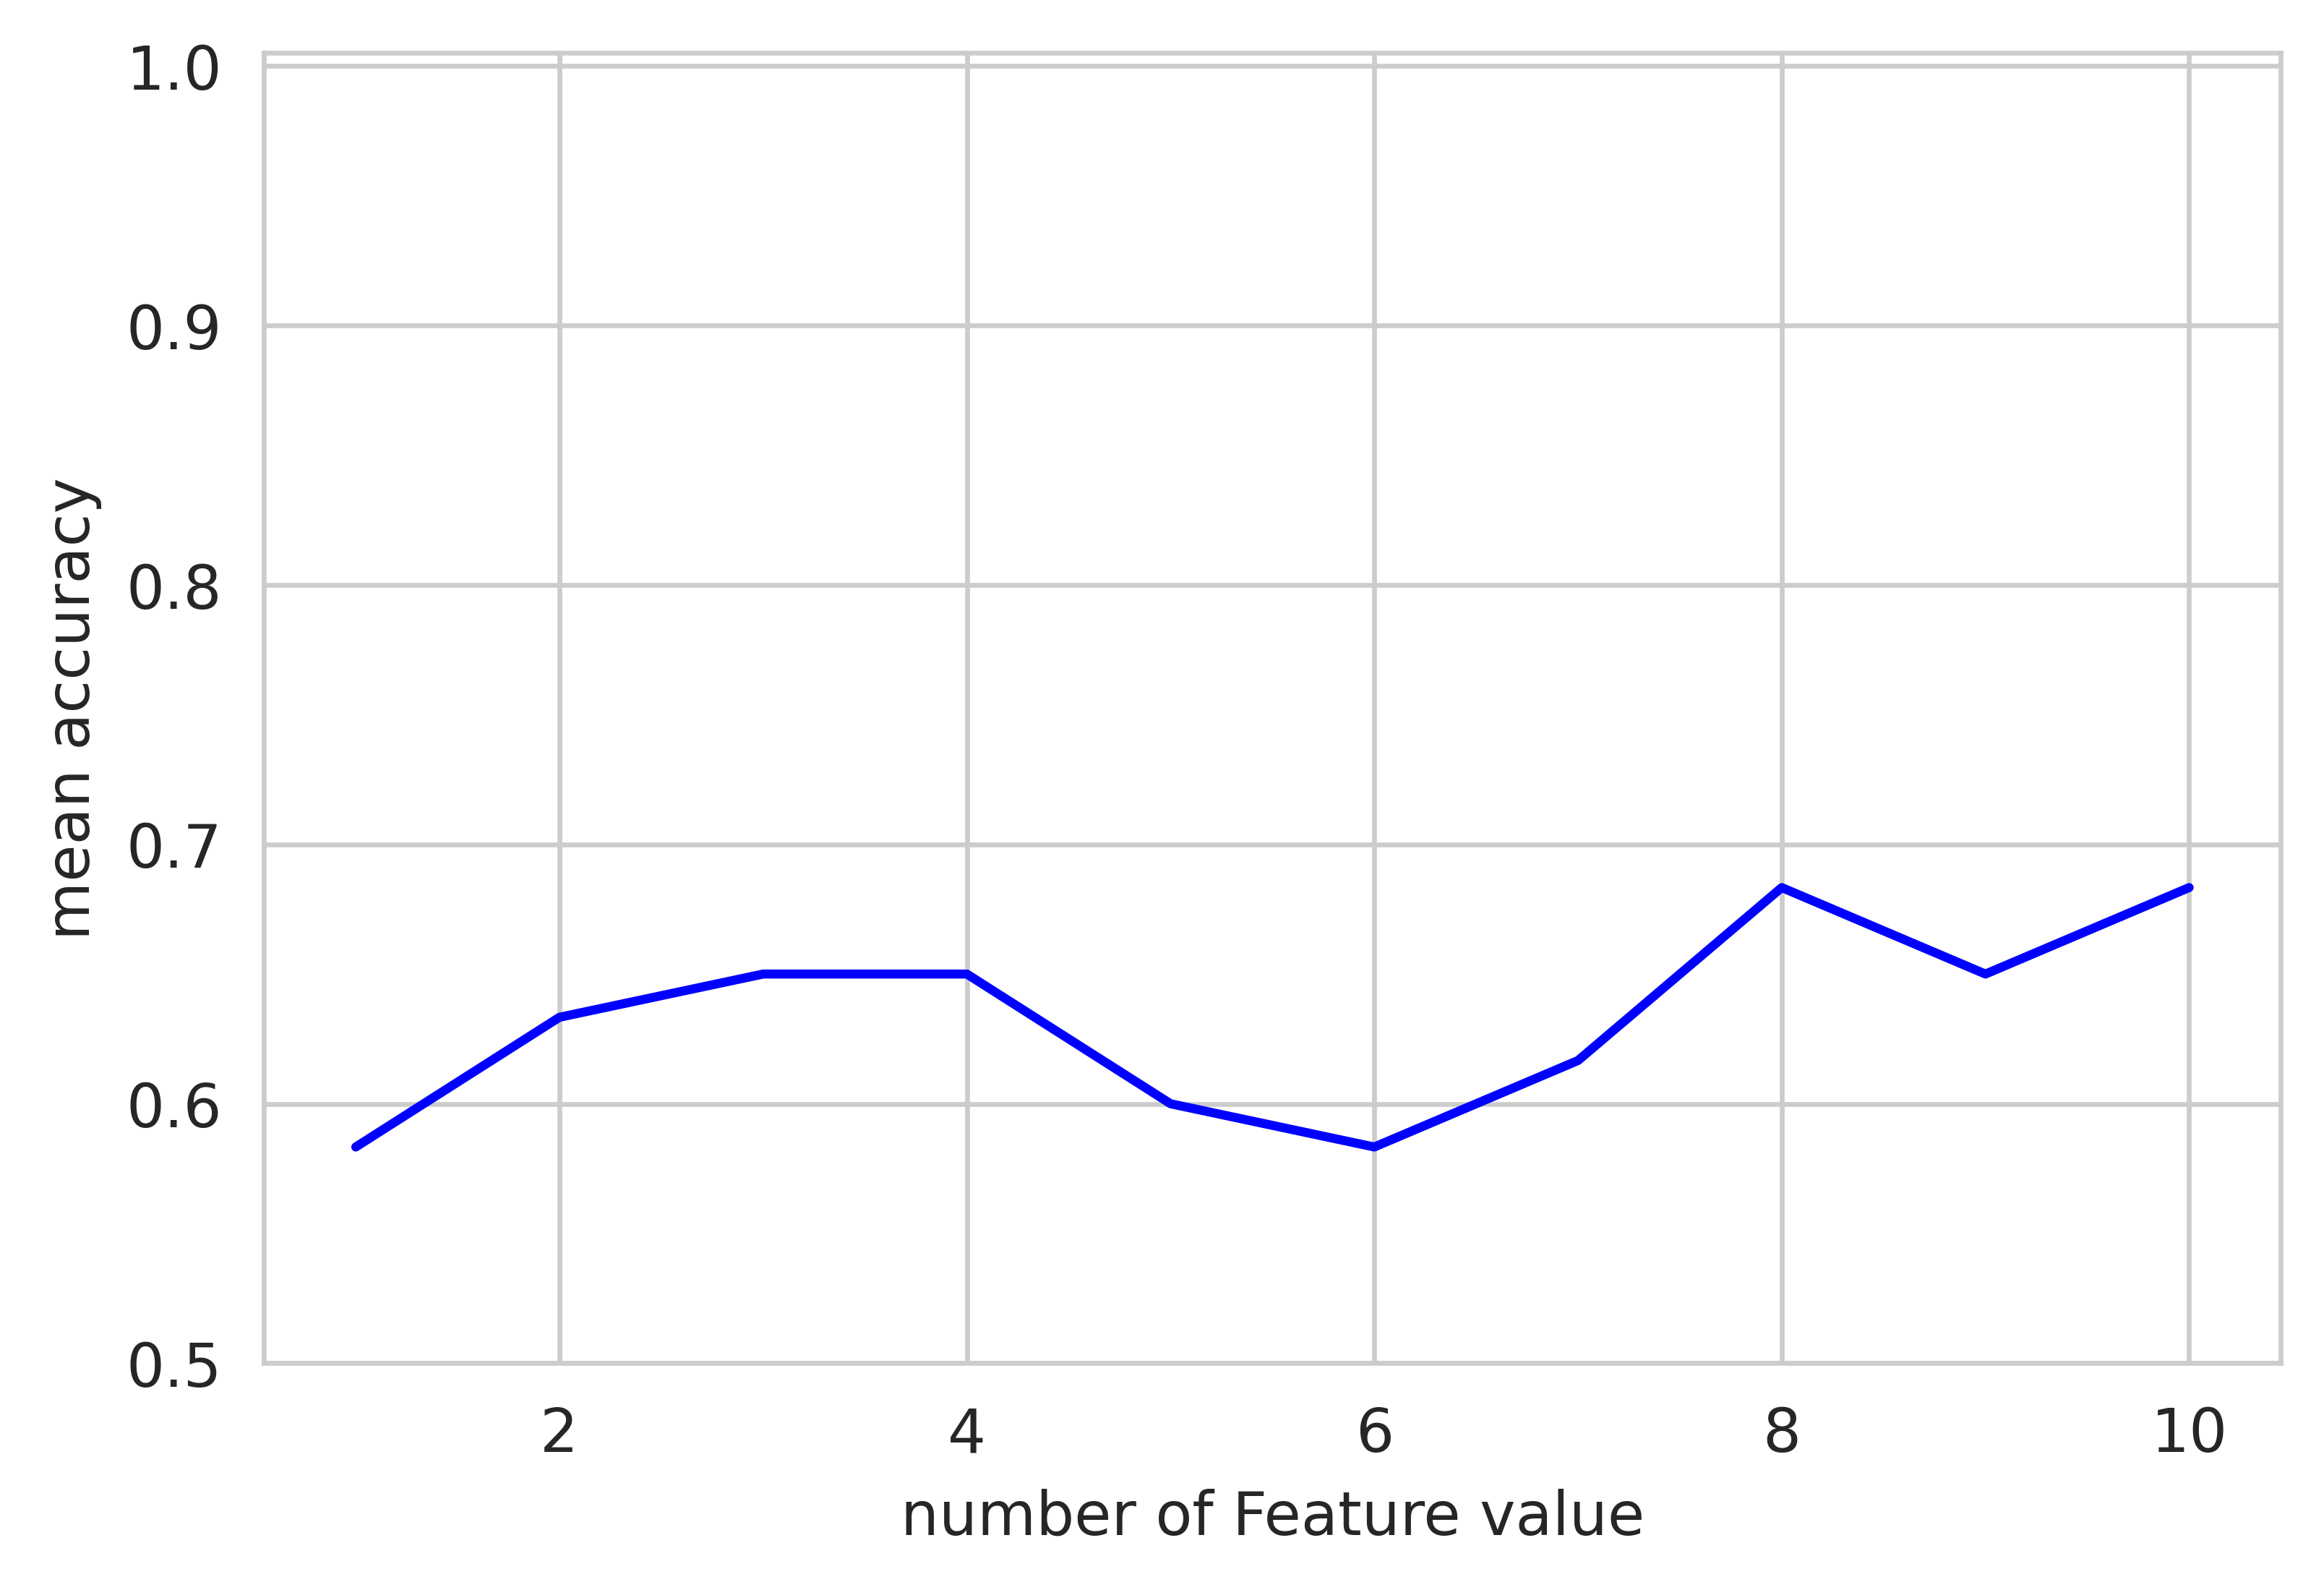

In [103]:
make_graph_pre(cross_all_log)

In [104]:
cross_all_log, df=make_cross(dfT2,'type', LogisticRegression(random_state=0))
df


,1,2,3,4,5,6,7,8,9,10
Acurrency,0.6,0.65,0.65,0.6,0.6,0.616667,0.6,0.616667,0.583333,0.583333


In [105]:
df.to_csv("logisticT247all.csv")

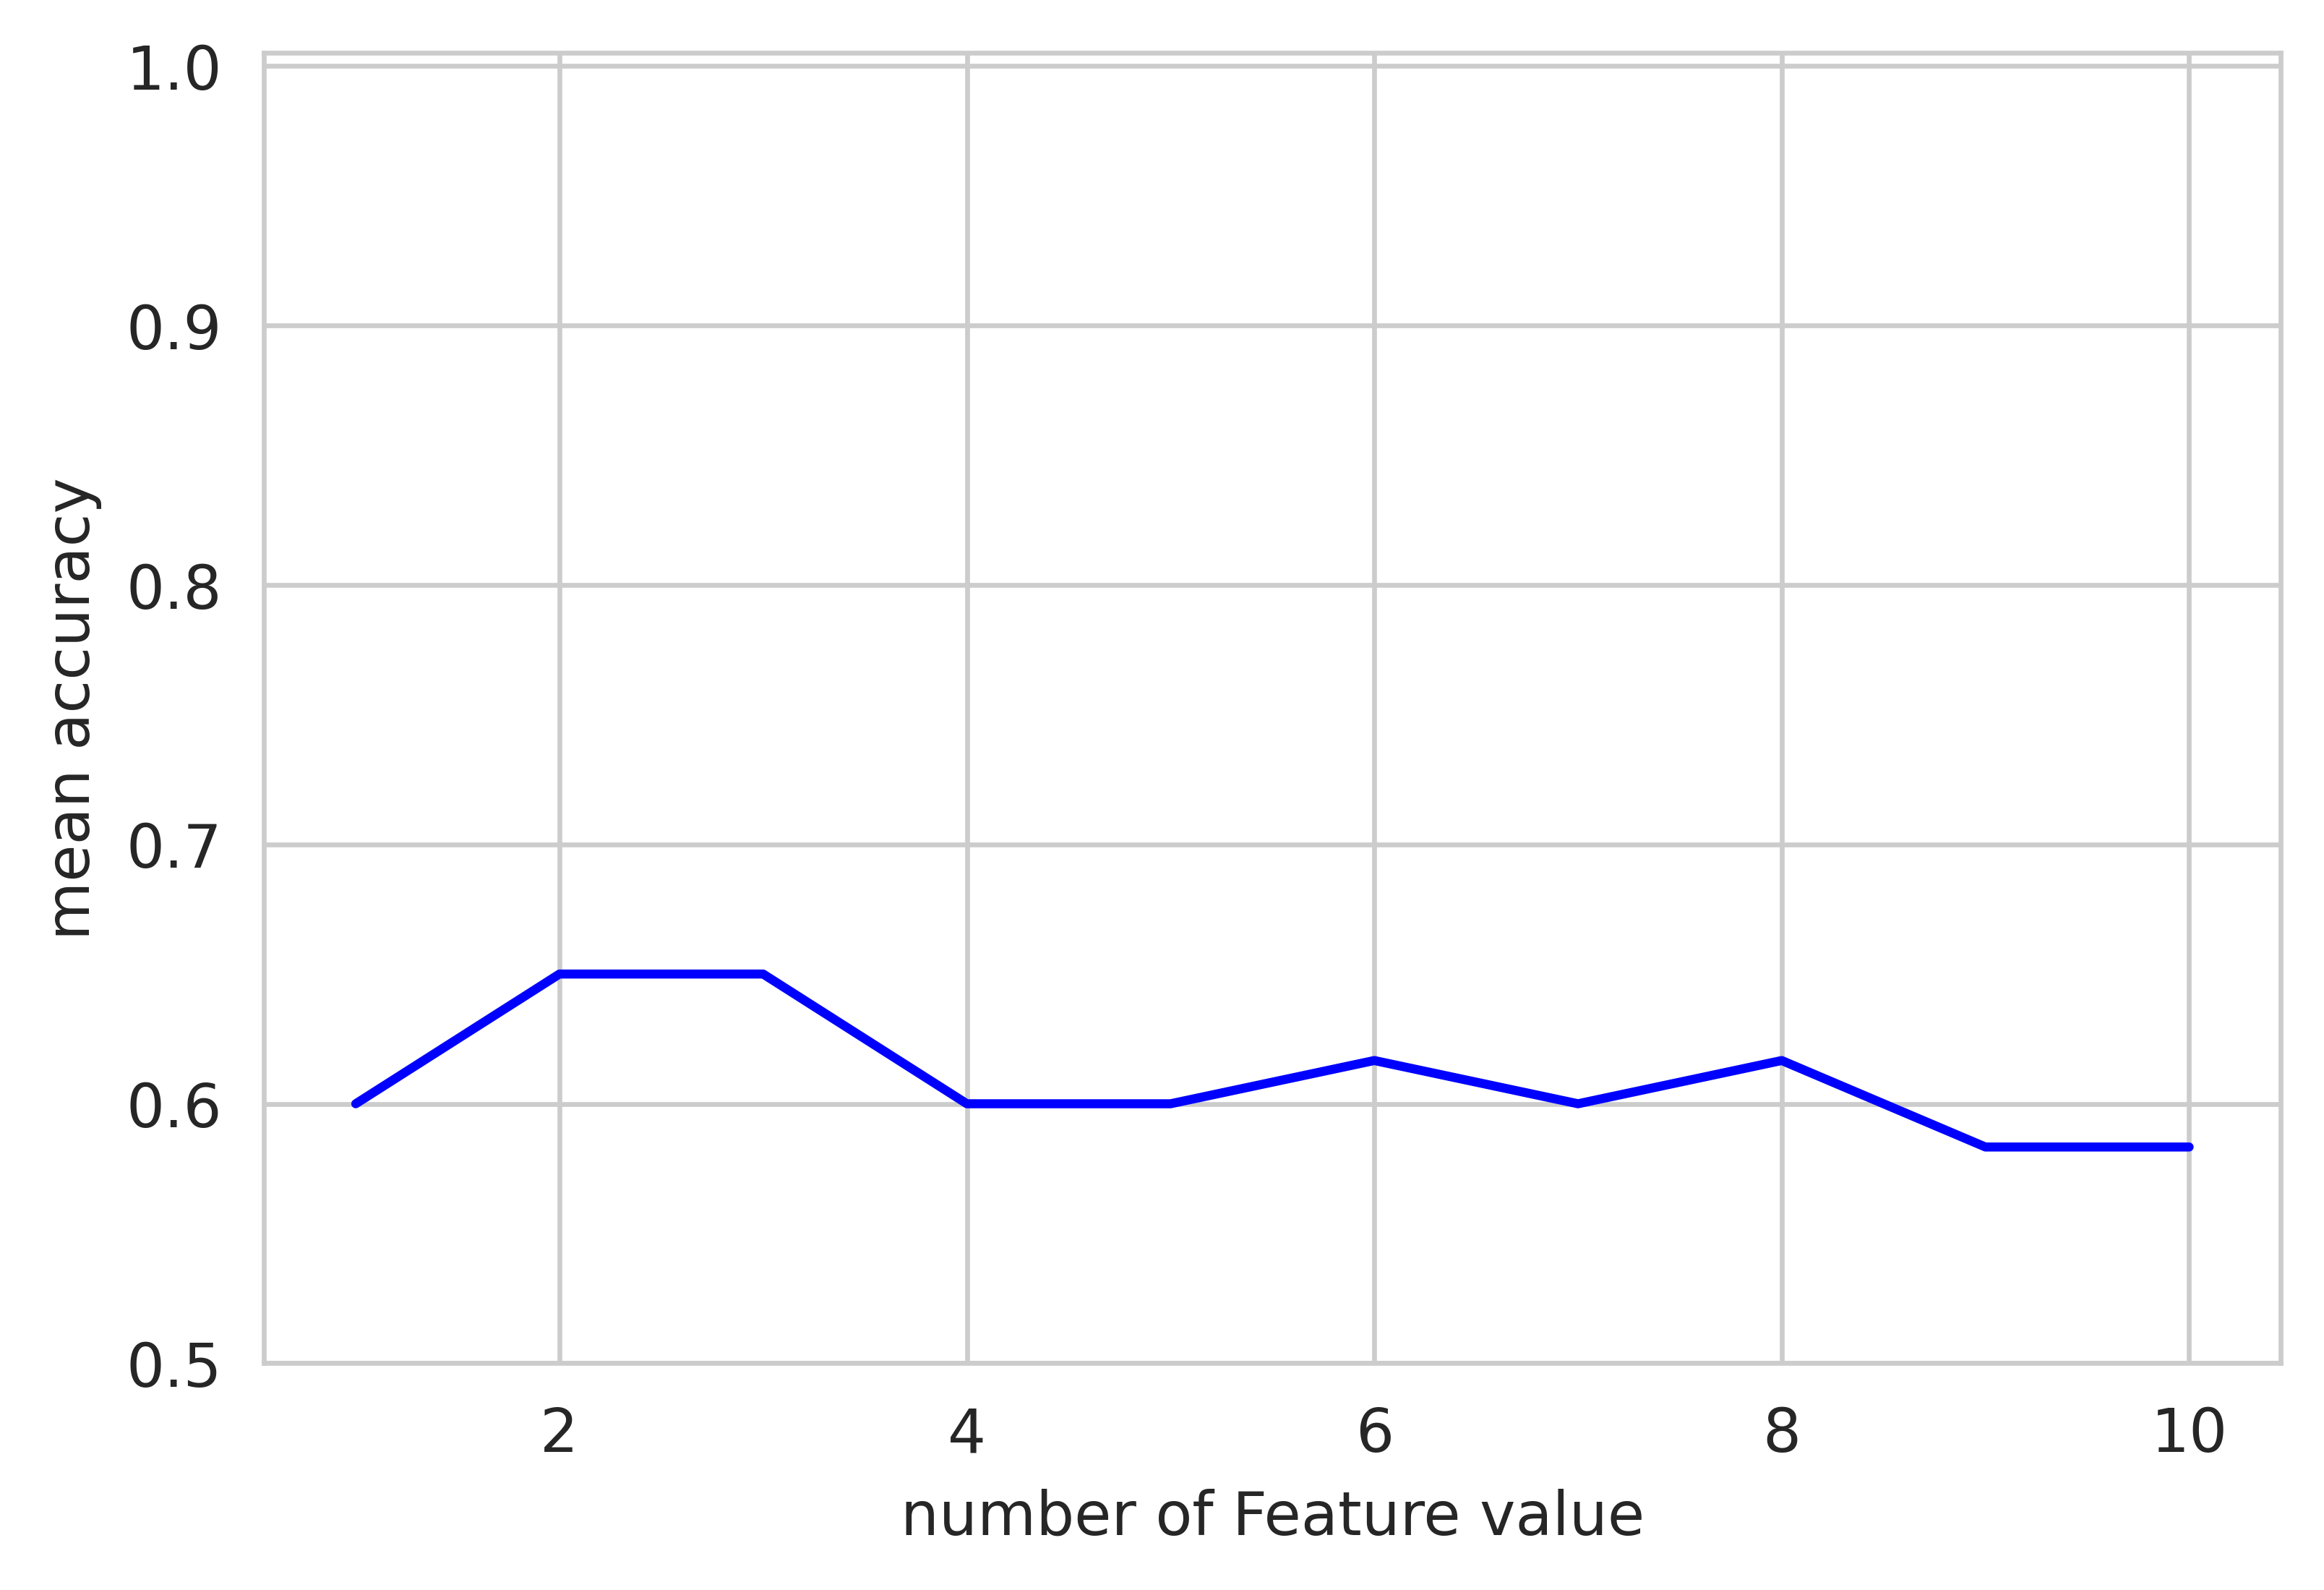

In [106]:
make_graph_pre(cross_all_log)